In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- cv2.warpAffine takes a 2x3
- cv2.warpPerspective takes a 3x3

- 강제변환(rigid-body) : 크기 및 각도 보존 (translation, rotation)
- 유사변환(similarity) : 크기만 변화고 각도 보존 (scaling)
- 선형변환(linear) : vector 공간에서의 이동
- Affine : 선형변환 + 이동변환 (사각형 > 평행사변형)
- Perspective : Affine변환에 수평성 유지 x

### scaling
- resizing of the image
##### Interpolation
- cv2.INTER_AREA : shrinking
- cv2.INTER_CUBIC & cv2.INTER_LINEAR : zooming
- cv2.INTER_LINEAR : 가장 기본

<function matplotlib.pyplot.show(close=None, block=None)>

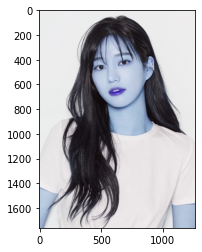

In [17]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')

# shrink
res = cv2.resize(img, None, fx = 0.5,fy = 0.5, interpolation = cv2.INTER_CUBIC)
# (img, dsize(manual size), fx, fy, interpolation)
# zoom
height, width = img.shape[:2]
res = cv2.resize(img, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.imshow(res)
plt.show

### Translation
- shifting

<function matplotlib.pyplot.show(close=None, block=None)>

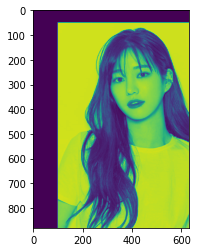

In [20]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg', 0)

rows, cols = img.shape[:2]
# M = [[1, 0, x], [0, 1, y]] x축, y축 이동값 적용
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows)) # (width, height)

plt.imshow(dst)
plt.show

### Rotation
- seta값만큼 회전

<function matplotlib.pyplot.show(close=None, block=None)>

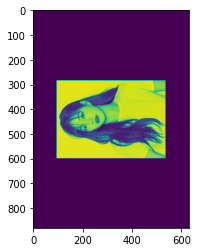

In [23]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg', 0)

rows, cols = img.shape[:2]

# 90 degree rotation and 0.5 scale
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.5)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.show

### Affine Transformation
- maintain parallel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x12116eaf0>)

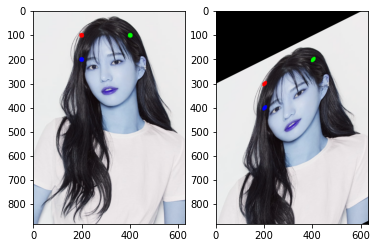

In [24]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200, 100], [400, 100], [200, 200]])
pts2 = np.float32([[200, 300], [400, 200], [200, 400]])

# check point
cv2.circle(img, (200, 100), 10, (255, 0, 0), -1)
cv2.circle(img, (400, 100), 10, (0, 255, 0), -1)
cv2.circle(img, (200, 200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)

### Perspective Transformation

- 원근법 변환 : 직선만 유지되고 평행성은 깨짐

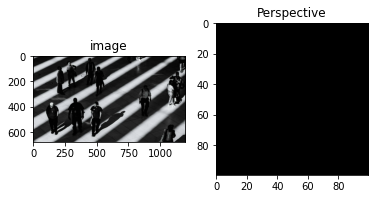

In [27]:
img = cv2.imread('/Users/sejongpyo/downloads/gray.jpg')

# 좌표점 4x2 행렬로 작성
# 좌상 > 좌하 > 우상 > 우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1280,1685]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 20, (255,0,0),-1)
cv2.circle(img, (243,1524), 20, (0,255,0),-1)
cv2.circle(img, (1000,1000), 20, (0,0,255),-1)
cv2.circle(img, (1280,1685), 20, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (100,100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()